In [1]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#set to pckl
mood1_csv = pd.read_csv("DED_MOOD_Gathering (13).csv", sep = ",")
mood1_csv.to_pickle("mood1_pckle.pckle")
mood1_dr = pd.read_pickle("mood1_pckle.pckle")

In [3]:
mood1_dr

,id,device_id,ts,activity,pp1,pp2,pp3,black,isTesting,PIR,recipient,sender,yellow
0,1,680,2021-05-01T19:15:08,NaN,NaN,NaN,NaN,61.0,1.0,0.0,2021_DED_MOOD_11_PROT_2,2021_DED_TEAM_MOOD_11_PROT_2,66.0
1,2,680,2021-05-01T19:15:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,680,2021-05-01T19:15:18,NaN,NaN,NaN,NaN,61.0,1.0,1.0,2021_DED_MOOD_11_PROT_2,2021_DED_TEAM_MOOD_11_PROT_2,100.0
3,4,680,2021-05-01T19:15:20,NaN,NaN,NaN,NaN,49.0,1.0,0.0,2021_DED_MOOD_11_PROT_2,2021_DED_TEAM_MOOD_11_PROT_2,100.0
4,5,680,2021-05-01T19:16:07,ACTIVITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,1391,680,2021-05-05T18:37:20,ACTIVITY,NaN,NaN,NaN,300.0,0.0,0.0,2021_DED_MOOD_11_PROT_2,2021_DED_TEAM_MOOD_11_PROT_2,0.0
1391,1392,680,2021-05-05T18:37:29,ACTIVITY,NaN,NaN,NaN,300.0,0.0,1.0,2021_DED_MOOD_11_PROT_2,2021_DED_TEAM_MOOD_11_PROT_2,0.0
1392,1393,680,2021-05-05T18:37:35,ACTIVITY,NaN,NaN,NaN,300.0,0.0,0.0,2021_DED_MOOD_11_PROT_2,2021_DED_TEAM_MOOD_11_PROT_2,0.0
1393,1394,680,2021-05-05T18:37:38,ACTIVITY,NaN,NaN,NaN,300.0,0.0,0.0,2021_DED_MOOD_11_PROT_2,2021_DED_TEAM_MOOD_11_PROT_2,0.0


In [4]:
#set ts to datetime
mood1_dr['ts'] = pd.to_datetime(mood1_dr['ts'])

In [5]:
#create a new df that only contains isTesting == 0 (all other values are testing rows or NaN rows)
#from row 636 bc the rows before were testing rows done by Wesley
#no NaN values from other columns
#this DF is withOUT the PIR values
mood0 = pd.DataFrame()

for i in range(len(mood1_dr)):
    if i>636 and mood1_dr['isTesting'][i] == 0.0 and np.isfinite(mood1_dr['black'][i]) == True and np.isfinite(mood1_dr['yellow'][i]) == True and mood1_dr['PIR'][i] == 0.0:
        mood0 = mood0.append(mood1_dr.loc[i], ignore_index=True)

In [6]:
#create a new df that only contains isTesting == 0 (all other values are testing rows or NaN rows)
#from row 636 bc the rows before were testing rows done by Wesley
#no NaN values from other columns
#this DF is with the PIR values
mood1 = pd.DataFrame()


for i in range(len(mood1_dr)):
    if i>636 and mood1_dr['isTesting'][i] == 0.0 and np.isfinite(mood1_dr['black'][i]) == True and np.isfinite(mood1_dr['yellow'][i]) == True:
        mood1 = mood1.append(mood1_dr.loc[i], ignore_index=True)

mood1   

,PIR,activity,black,device_id,id,isTesting,pp1,pp2,pp3,recipient,sender,ts,yellow
0,0.0,ACTIVITY,279.0,680.0,638.0,0.0,NaN,NaN,NaN,2021_DED_MOOD_11_PROT_2,2021_DED_TEAM_MOOD_11_PROT_2,2021-05-03 14:28:45,402.0
1,0.0,ACTIVITY,476.0,680.0,639.0,0.0,NaN,NaN,NaN,2021_DED_MOOD_11_PROT_2,2021_DED_TEAM_MOOD_11_PROT_2,2021-05-03 14:28:46,405.0
2,0.0,ACTIVITY,473.0,680.0,640.0,0.0,NaN,NaN,NaN,2021_DED_MOOD_11_PROT_2,2021_DED_TEAM_MOOD_11_PROT_2,2021-05-03 14:28:46,404.0
3,0.0,ACTIVITY,474.0,680.0,641.0,0.0,NaN,NaN,NaN,2021_DED_MOOD_11_PROT_2,2021_DED_TEAM_MOOD_11_PROT_2,2021-05-03 14:28:48,406.0
4,1.0,ACTIVITY,476.0,680.0,642.0,0.0,NaN,NaN,NaN,2021_DED_MOOD_11_PROT_2,2021_DED_TEAM_MOOD_11_PROT_2,2021-05-03 14:28:54,409.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,0.0,ACTIVITY,300.0,680.0,1391.0,0.0,NaN,NaN,NaN,2021_DED_MOOD_11_PROT_2,2021_DED_TEAM_MOOD_11_PROT_2,2021-05-05 18:37:20,0.0
754,1.0,ACTIVITY,300.0,680.0,1392.0,0.0,NaN,NaN,NaN,2021_DED_MOOD_11_PROT_2,2021_DED_TEAM_MOOD_11_PROT_2,2021-05-05 18:37:29,0.0
755,0.0,ACTIVITY,300.0,680.0,1393.0,0.0,NaN,NaN,NaN,2021_DED_MOOD_11_PROT_2,2021_DED_TEAM_MOOD_11_PROT_2,2021-05-05 18:37:35,0.0
756,0.0,ACTIVITY,300.0,680.0,1394.0,0.0,NaN,NaN,NaN,2021_DED_MOOD_11_PROT_2,2021_DED_TEAM_MOOD_11_PROT_2,2021-05-05 18:37:38,0.0


In [7]:
#clean DF (without the useless columns) with PIR
mood = pd.DataFrame(mood1[['ts', 'black', 'PIR', 'yellow']])

mood

,ts,black,PIR,yellow
0,2021-05-03 14:28:45,279.0,0.0,402.0
1,2021-05-03 14:28:46,476.0,0.0,405.0
2,2021-05-03 14:28:46,473.0,0.0,404.0
3,2021-05-03 14:28:48,474.0,0.0,406.0
4,2021-05-03 14:28:54,476.0,1.0,409.0
...,...,...,...,...
753,2021-05-05 18:37:20,300.0,0.0,0.0
754,2021-05-05 18:37:29,300.0,1.0,0.0
755,2021-05-05 18:37:35,300.0,0.0,0.0
756,2021-05-05 18:37:38,300.0,0.0,0.0


In [8]:
#clean DF (without the useless columns) without PIR
mood_sl = pd.DataFrame(mood0[['ts', 'black', 'yellow']])
mood_sl

,ts,black,yellow
0,2021-05-03 14:28:45,279.0,402.0
1,2021-05-03 14:28:46,476.0,405.0
2,2021-05-03 14:28:46,473.0,404.0
3,2021-05-03 14:28:48,474.0,406.0
4,2021-05-03 14:29:01,475.0,408.0
...,...,...,...
540,2021-05-05 18:37:15,300.0,0.0
541,2021-05-05 18:37:20,300.0,0.0
542,2021-05-05 18:37:35,300.0,0.0
543,2021-05-05 18:37:38,300.0,0.0


In [9]:
#SHOW ME WHAT YOU GOT
mood_sl.describe()

,black,yellow
count,545.000000,545.000000
mean,268.236697,574.783486
std,187.447779,242.098692
min,0.000000,0.000000
25%,0.000000,485.000000
50%,335.000000,735.000000
75%,336.000000,739.000000
max,656.000000,1023.000000


In [10]:
#resample without PIR on half an hour, since the entries do not happen in the miliseconds the dataset registers
#resampeling on last value to get the value it was set to
#and reset the index to actually have an index instad of ts as the index
sl_min_last = mood_sl.resample('30T', on = 'ts')[['black', 'yellow']].last().reset_index()

sl_min_last

,ts,black,yellow
0,2021-05-03 14:00:00,474.0,409.0
1,2021-05-03 14:30:00,0.0,488.0
2,2021-05-03 15:00:00,NaN,NaN
3,2021-05-03 15:30:00,NaN,NaN
4,2021-05-03 16:00:00,NaN,NaN
...,...,...,...
101,2021-05-05 16:30:00,NaN,NaN
102,2021-05-05 17:00:00,NaN,NaN
103,2021-05-05 17:30:00,NaN,NaN
104,2021-05-05 18:00:00,NaN,NaN


In [11]:
#create a new df without the NaN values created by the .resample()
sl = pd.DataFrame()

for i in range(len(sl_min_last)):
    if np.isfinite(sl_min_last['black'][i]) == True and np.isfinite(sl_min_last['yellow'][i]) == True:
        sl = sl.append(sl_min_last.loc[i], ignore_index=True)

sl

,black,ts,yellow
0,474.0,2021-05-03 14:00:00,409.0
1,0.0,2021-05-03 14:30:00,488.0
2,83.0,2021-05-04 20:30:00,277.0
3,336.0,2021-05-05 09:30:00,739.0
4,303.0,2021-05-05 18:30:00,0.0


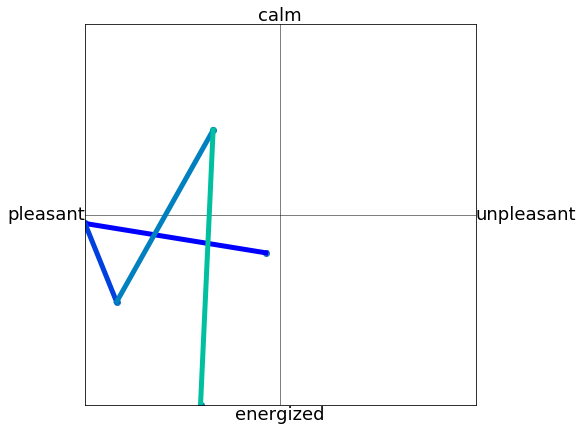

In [12]:
#scatterplot with lines between the points that change colour
fig, ax = plt.subplots(figsize = (7, 7))

#set the min, max and middle to use more often
mid_ = 512
min_ = 0
max_ = 1024

#zet limits and select the data into scatterplot
ax.set(xlim=(min_, max_), ylim=(min_, max_))
ax.scatter(sl["black"], sl["yellow"])

#add the lines in the middle and give them titles
ax.axhline(mid_, color = 'black', linewidth = 0.5)
ax.axvline(mid_, color = 'black', linewidth = 0.5)

#0 was top of the slider, 1024 bottom
ax.text(mid_, min_, "energized", color="black", fontsize=18, ha = 'center', va = 'top')
ax.text(mid_, max_, "calm", color="black", fontsize=18, ha = 'center', va = 'bottom')
ax.text(min_, mid_, "pleasant", color="black", fontsize=18, ha = 'right', va = 'center')
ax.text(max_, mid_, "unpleasant", color="black", fontsize=18, ha = 'left', va = 'center')

#set values on x- and y-axis to nothing as to not distract
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])

#CONSTANTS
NPOINTS = len(sl)
COLOR='blue'
RESFACT= 10
MAP='winter' # choose carefully, or color transitions will not appear smoooth

#credit https://stackoverflow.com/questions/8500700/how-to-plot-a-gradient-color-line-in-matplotlib
# Choose a color map, loop through the colors, and assign them to the color 
# cycle. You need NPOINTS-1 colors, because you'll plot that many lines 
# between pairs. In other words, your line is not cyclic, so there's 
# no line from end to beginning
cm = plt.get_cmap(MAP)
ax.set_prop_cycle(color=[cm(1.*i/(NPOINTS-1)) for i in range(NPOINTS-1)])
for i in range(NPOINTS-1):
    ax.plot(sl["black"][i:i+2], sl["yellow"][i:i+2], linewidth = 5)

plt.savefig('gradient_axis_eerste_test.png')
plt.show()

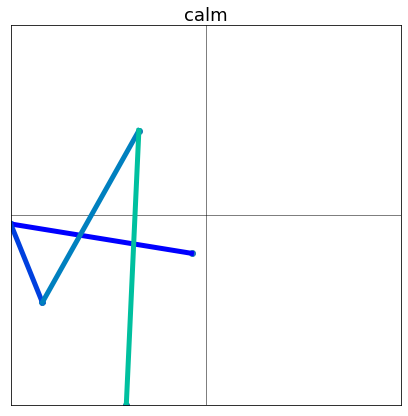

In [13]:
#scatterplot with lines between the points that change colour
fig, ax = plt.subplots(figsize = (7, 7))

#set the min, max and middle to use more often
mid_ = 512
min_ = 0
max_ = 1024

#zet limits and select the data into scatterplot
ax.set(xlim=(min_, max_), ylim=(min_, max_))
ax.scatter(sl["black"], sl["yellow"])

#add the lines in the middle and give them titles
ax.axhline(mid_, color = 'black', linewidth = 0.5)
ax.axvline(mid_, color = 'black', linewidth = 0.5)

#0 was top of the slider, 1024 bottom
#ax.text(mid_, min_, "energized", color="black", fontsize=18, ha = 'center', va = 'top')
ax.text(mid_, max_, "calm", color="black", fontsize=18, ha = 'center', va = 'bottom')
#ax.text(min_, mid_, "pleasant", color="black", fontsize=18, ha = 'right', va = 'center')
#ax.text(max_, mid_, "unpleasant", color="black", fontsize=18, ha = 'left', va = 'center')

#set values on x- and y-axis to nothing as to not distract
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])

#CONSTANTS
NPOINTS = len(sl)
COLOR='blue'
RESFACT= 10
MAP='winter' # choose carefully, or color transitions will not appear smoooth

# Choose a color map, loop through the colors, and assign them to the color 
# cycle. You need NPOINTS-1 colors, because you'll plot that many lines 
# between pairs. In other words, your line is not cyclic, so there's 
# no line from end to beginning
cm = plt.get_cmap(MAP)
ax.set_prop_cycle(color=[cm(1.*i/(NPOINTS-1)) for i in range(NPOINTS-1)])
for i in range(NPOINTS-1):
    ax.plot(sl["black"][i:i+2], sl["yellow"][i:i+2], linewidth = 5)

plt.savefig('gradient_axis_eerste_testgeen_label.png')
plt.show()